1. 梯度消失

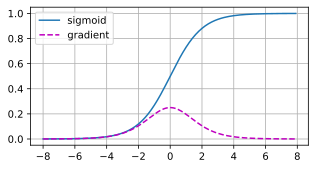

In [4]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

%matplotlib inline

import torch
from d2l import torch as d2l

# 创建输入数据 x
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)

# 创建激活函数 sigmoid
y = torch.sigmoid(x)

# 计算梯度
'''
1. 对于标量输出, 可以直接调用 y.backward(), 等价于 y.backward(torch.tensor(1.0))
2. 当输出部署标量时, 必须提供 gradient 参数,
'''
y.backward(torch.ones_like(x))

# 绘图
d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()], legend=['sigmoid', 'gradient'], figsize=(5, 2.5))

- 2. 梯度爆炸

In [2]:
import torch

M = torch.normal(0, 1, (4,4))
print('M ', M)

for i in range(100):
    M = torch.mm(M, torch.normal(0, 1, (4,4)))

print("乘以 100 个 4 x 4 的矩阵后 ", M)

M  tensor([[ 1.3767,  0.2275, -0.1905, -0.1813],
        [-0.1644, -1.3006, -0.3485,  2.4131],
        [ 0.6876,  1.5511,  0.1927, -2.2062],
        [ 1.1632, -0.7266,  0.0394,  0.6795]])
乘以 100 个 4 x 4 的矩阵后  tensor([[ 2.7158e+25, -2.7035e+25,  6.1670e+24,  1.2338e+25],
        [ 4.7397e+25, -4.7182e+25,  1.0763e+25,  2.1533e+25],
        [-3.2809e+25,  3.2660e+25, -7.4505e+24, -1.4905e+25],
        [ 4.7079e+25, -4.6866e+25,  1.0691e+25,  2.1388e+25]])
